In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import btrdb
from btrdb.utils.timez import ns_delta, ns_to_datetime, to_nanoseconds

In [2]:
YOUR_API_KEY = '2301C47D67FB1C2C48D0CC7B'

#Establishing the connecting to the server
db = btrdb.connect("api.ni4ai.org:4411", apikey=YOUR_API_KEY)


In [3]:
streams = db.streams_in_collection('golden')
streams = [s for s in streams if s.name == 'LSTATE']

In [4]:
len(streams)

10

In [7]:
first = np.inf
last = -np.inf
for s in streams:
    (start, val), _ = s.earliest()
    (end, val), _ = s.latest()
    
    if start < first:
        first = int(start)
    if end > last:
        last = int(end)
        

In [13]:
pw = 44
points = s.aligned_windows(first, last, pw)

In [14]:
times, counts = zip(*[(p.time, p.count) for p,_ in points])

In [15]:
len(times), len(counts)

(1226, 1226)

In [16]:
pw = 50
counts = []
for s in streams:
    points = s.aligned_windows(first, last, pw)
    t, c = zip(*[(ns_to_datetime(p.time), p.count) for p, _ in points])
    counts.append(pd.Series(c, index=t))


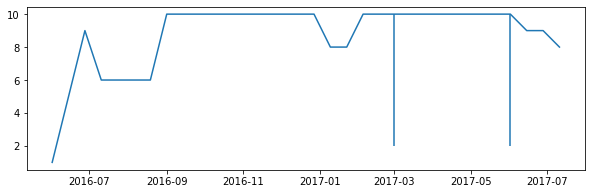

In [21]:
df = pd.concat(counts, axis=1).sort_index().iloc[1:]
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df.index, pd.notnull(df).sum(axis=1).tolist())
ax.vlines([datetime(2017,3,1), datetime(2017,6,1)], 2,10)
plt.show()

In [24]:
pw = 36
points = s.aligned_windows(to_nanoseconds(datetime(2017,3,1)), to_nanoseconds(datetime(2017,6,1)), pw)

In [40]:
counts = []
for s in streams:
    points = s.aligned_windows(first, last, pw)
    t, c = zip(*[(ns_to_datetime(p.time), p.count) for p, _ in points])
    counts.append(pd.Series(c, index=t))

In [41]:
df = pd.DataFrame(columns=range(len(counts)), index=counts[0].index)
for i in range(len(counts)):
    df[i] = counts[i]

In [62]:
[s.collection for s in streams]

['golden/PMU8',
 'golden/PMU3',
 'golden/PMU7',
 'golden/PMU9',
 'golden/PMU2',
 'golden/PMU4',
 'golden/PMU5',
 'golden/PMU6',
 'golden/PMU1',
 'golden/PMU10']

In [45]:
df.index[0]

Timestamp('2000-12-30 23:59:49.264286+0000', tz='UTC')

In [55]:
from datetime import timezone, timedelta

idx = df.index >= datetime(2017,3,1, tzinfo=timezone(timedelta(hours=0)))
idx &= df.index <= datetime(2017,6,1, tzinfo=timezone(timedelta(hours=0)))

In [60]:
for col in df[idx].keys():
    print(col, df[idx][pd.notnull(df[idx][col])].index.min(), df[pd.notnull(df[col])].index.max())

0 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
1 2017-03-14 23:59:18.658318+00:00 2017-07-18 12:22:59.282027+00:00
2 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
3 2017-03-01 00:00:27.148288+00:00 2017-06-27 22:28:51.540959+00:00
4 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
5 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
6 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
7 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00
8 2017-03-01 00:00:27.148288+00:00 2017-06-04 02:41:48.334809+00:00
9 2017-03-01 00:00:27.148288+00:00 2017-07-18 12:22:59.282027+00:00


In [ ]:
fig, ax = plt.subplots()
ax.plot(stream_avail)

In [14]:
stream_avail.head()

,C2MAG,LSTATE,LSTATE,L3ANG,L1ANG,L3ANG,L3MAG,L1ANG,L1MAG,C2ANG,...,L3ANG,C3MAG,C3ANG,L1MAG,LSTATE,C3MAG,C2MAG,C2MAG,C2ANG,L1MAG
2000-12-30 23:59:57.008333+00:00,0,120,240,0,240,0,0,0,240,0,...,0,0,120,0,240,0,0,0,0,0
2000-12-31 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-02 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-03 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
